In [0]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import font_manager, rc 


plt.rcParams['figure.figsize'] = (10,6) # 그림 그릴 배경 사이즈 비율
%matplotlib inline
plt.style.use('ggplot')
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_csv('bike_train.csv', parse_dates = ['datetime']) # 해당 컬럼을 datetime으로
data.shape

(10886, 12)

In [3]:
test = pd.read_csv('bike_test.csv', parse_dates = ['datetime'])
test.shape

(6493, 9)

## EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.6 KB


In [6]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

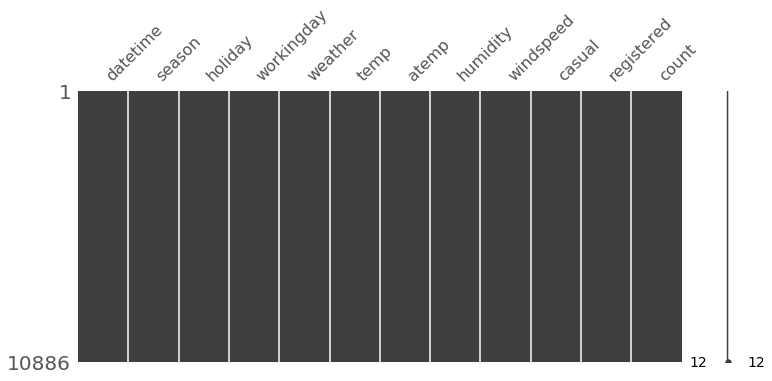

In [9]:
import missingno as msno
msno.matrix(data, figsize = (12, 5)) # not NaN

## datetime division

In [10]:
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data['second'] = data['datetime'].dt.second
data['dayofweek'] = data['datetime'].dt.dayofweek
data.shape

(10886, 19)

In [11]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek
test.shape

(6493, 16)

In [12]:
data.loc[:, 'year':].head()

,year,month,day,hour,minute,second,dayofweek
0,2011,1,1,0,0,0,5
1,2011,1,1,1,0,0,5
2,2011,1,1,2,0,0,5
3,2011,1,1,3,0,0,5
4,2011,1,1,4,0,0,5


## 풍속 값 변경

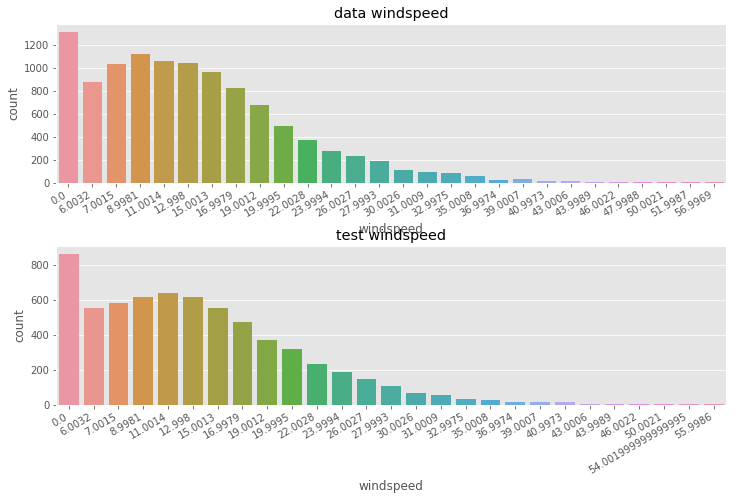

In [13]:
fig, ax = plt.subplots(2, 1, figsize = (12, 7))
plt.sca(ax[0])
plt.xticks(rotation = 30, ha = 'right')
ax[0].set(ylabel = 'Count', title = 'data windspeed')
sns.countplot(data = data, x = 'windspeed', ax = ax[0])
          
plt.sca(ax[1])
plt.xticks(rotation = 30, ha = 'right')
ax[1].set(ylabel = 'Count', title = 'test windspeed')
sns.countplot(data = test, x = 'windspeed', ax = ax[1])
plt.subplots_adjust(wspace = 0.2, hspace = 0.4)
plt.show()

In [0]:
# 풍속 0은 측정을 하지 않은 값인데, 평균으로 넣어줘도 도움이 될 거 같지 않음.

In [15]:
from sklearn.ensemble import RandomForestClassifier
  
# 풍속이 0인 것과 아닌 데이터들을 분류한다.
dataWind0 = data.loc[data['windspeed'] == 0]
dataWindNot0 = data.loc[data['windspeed'] != 0]

dataWind0.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [16]:
dataWindNot0.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0,5
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,0,0,5
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,0,0,5
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,1,12,0,0,5
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,1,13,0,0,5


In [17]:
# 풍속을 예측할 피처를 선택한다.
wCol = ['season', 'weather', 'humidity', 'month', 'temp', 'year', 'atemp']

# 풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype('str')
dataWindNot0.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0,5
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,0,0,5
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,0,0,5
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,1,12,0,0,5
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,1,13,0,0,5


In [18]:
# 랜덤 포레스트 분류기 사용
rfModel_wind = RandomForestClassifier()

# 풍속을 예측할 피처들의 값을 파탕으로 풍속을 학습시킨다.
rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0['windspeed'])# X_train, y_train

# 학습한 값을 바탕으로 풍속이 0으로 기록된 데이터의 풍속을 예측한다.
wind0Values = rfModel_wind.predict(X = dataWind0[wCol])

wind0Values

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array(['6.0032', '6.0032', '6.0032', ..., '7.0015', '12.998', '11.0014'],
      dtype=object)

In [19]:
# 비교를 위해 복사해준다.
predictWind0 = dataWind0
predictWindNot0 = dataWindNot0
# 값이 0으로 기록된 풍속에 대해 예측한 값을 넣어준다.
predictWind0['windspeed'] = wind0Values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [20]:
predictWind0.head() # 예측한 값을 넣어줌

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.0032,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.0032,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.0032,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.0032,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.0032,0,1,1,2011,1,1,4,0,0,5


In [21]:
# 0이 아닌 풍속 df에 예측한 값을 합쳐준다.
data = predictWindNot0.append(predictWind0)

# 풍속의 데이터 타입을 float로 지정
data['windspeed'] = data['windspeed'].astype('float')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0,5
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,0,0,5
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,0,0,5
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,1,12,0,0,5
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,1,13,0,0,5


In [22]:
# 지정된 인덱스를 버리고 실제값에 반환
data.reset_index(inplace = True)
data.drop('index', inplace = True, axis = 1)
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0,5
1,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,0,0,5
2,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,0,0,5
3,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,1,12,0,0,5
4,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,1,13,0,0,5


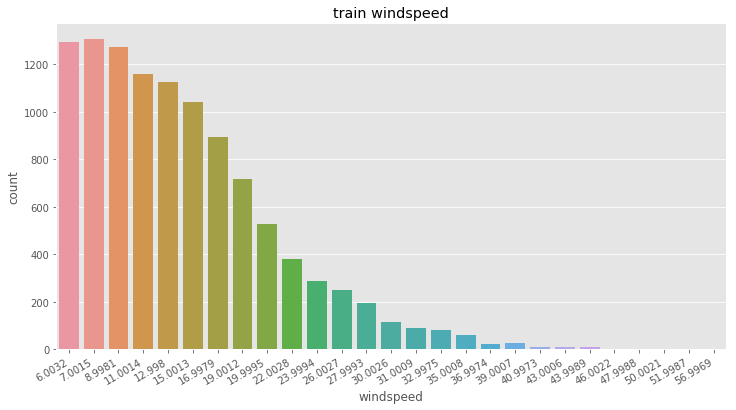

In [23]:
train =data
fig, ax = plt.subplots(figsize = (12, 6))
plt.sca(ax)
plt.xticks(rotation = 30, ha = 'right') # 글씨 겹침 방지, 기울기 설정
ax.set(ylabel = 'Count', title = 'train windspeed')
sns.countplot(data = train, x = 'windspeed', ax = ax)

## Feature Selection
- 신호와 잡음을 구분
- 피처가 많다고 좋은 건 아님
- 피처를 하나씩 추가해서 결과를 보고 판단

In [0]:
# 범주형 피처를 카테고리형으로 변경
categorical_feature_names = ['season', 'holiday', 'workingday' , 'weather', 'dayofweek', 'month', 'year', 'hour']
for var in categorical_feature_names:
    train[var] = train[var].astype('category')
    test[var] = test[var].astype('category')

In [25]:
feature_names = ['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'hour', 'dayofweek',
                            'holiday', 'workingday']
feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [26]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0,0


In [27]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [28]:
label_name = 'count'
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

## Score
## RMSLE

과대평가된 항목보다 과소에 패널티를 줌, 값이 작을수록 정밀도가 높음
![image.png](attachment:image.png)

In [29]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이를 배열 형태로 변경
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값, 실제값에 1을 더하고 로그를 씌어줌
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

## K-Fold

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

## RandomForest

In [0]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []
model = RandomForestRegressor(n_estimators = 1000, # 트리 100개
                                                         n_jobs = -1, # 컴퓨터의 모든 코어를 사용
                                                         random_state = 0)

In [32]:
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [33]:
%time score = cross_val_score(model, X_train, y_train, cv = k_fold, scoring = rmsle_scorer)
score = score.mean()
print('score = {:.5f}'.format(score))

CPU times: user 26.8 s, sys: 5.78 s, total: 32.6 s
Wall time: 4min 16s
score = 0.32912


## Train

In [34]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [35]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions[0:10]

(6493,)


array([ 11.803     ,   4.92      ,   4.03533333,   3.518     ,
         2.96      ,   6.597     ,  38.341     , 106.959     ,
       239.535     , 137.268     ])

Text(0.5, 1.0, 'test')

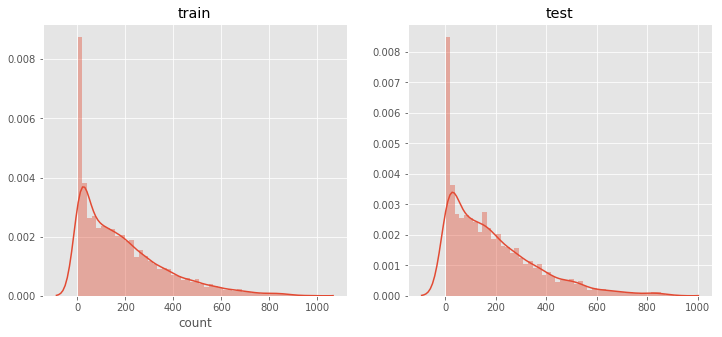

In [36]:
fig, ax = plt.subplots(figsize = (12, 5), ncols = 2)
sns.distplot(y_train, ax = ax[0], bins = 50)
ax[0].set_title('train')
sns.distplot(predictions, ax= ax[1], bins = 50)
ax[1].set_title('test')

## Submit

In [37]:
submission = pd.read_csv('sampleSubmission.csv')
submission

submission['count'] = predictions
print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.803000
1,2011-01-20 01:00:00,4.920000
2,2011-01-20 02:00:00,4.035333
3,2011-01-20 03:00:00,3.518000
4,2011-01-20 04:00:00,2.960000


In [0]:
submission.to_csv('Score_{:.5f}_submission.csv'.format(score), index = False)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [0]:
431/3501